<a href="https://colab.research.google.com/github/ImSumitJadhav/Find-degree-of-profanity-of-tweets/blob/main/Profanity_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name : To find Degree of Profanity in tweets**

---

In [74]:
#import libraries
import pandas as pd
import numpy as np

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import google drive 
from google.colab import drive

# **1.To find profanity present in sentence or not**

---

In [75]:
#give word or sentence which we to find out the word or sentence consist of a bad word
text=input()

you are shit


In [76]:
#install packages
!pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#import profanity libraries
from better_profanity import profanity

#split by means of " "(spaces)
text=text.split(" ")

true_len=0
false_len=0

#for loop to get each word in sentence 
for i in text:
    #count number of words present in the sentence
    if profanity.contains_profanity(i)==True:
        true_len=true_len+1
    else:
      false_len=false_len+1

#total number of words
total_len=true_len+false_len

#condition to find bad word present in the sentence
#if word present then find out degree of profanity
if true_len >= 1:
  print("Profanity Present")

  #degree of profanity=Sum of bad words present in the tweet divided by total length of tweet.This value store in new column called "degree_of_profinity"
  degree=(true_len/total_len)
  print("Degree of Profanity {} ".format(degree))

#else print no profanity present
else:
  print("Profanity Not Present")
  print("Degree of Profanity is ZERO")

Profanity Present
Degree of Profanity 0.3333333333333333 


**Import dataframe**

In [58]:
#mount drive
drive.mount('/content/MyDrive') 

#select file path which we have to used and read by pandas  
df=pd.read_csv('/content/MyDrive/MyDrive/alma project prctice/labeled_data.csv')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


# **2.Find out degree of profanity by each tweet with help of dataset(NLP)**

---




In [59]:
#take only 500 rows from the dataset
df=df.head(500)

#our aim is to find degree of profanity by means of tweets only,so select only "tweet" column
df=df.iloc[:,-1:]

#final dataset
df

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...
495,"""I'm a funky ass honkey."" - @jtimberlake 's sh..."
496,"""I'm comparing KFC to the pussy"" @MaxOn_MaxOff5"
497,"""I'm downloading you a new personality and ord..."
498,"""I'm feelin like Malcolm in the middle, these ..."


In [60]:
#shape of dataframe
df.shape

(500, 1)

In [61]:
#find out number of null values present in dataframe
df.isnull().sum()

tweet    0
dtype: int64

**There is no null values present in the "tweet" column.**

In [62]:
#import some libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [63]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
### NLP ###

#stemming
ps = PorterStemmer()

#define one empty list
corpus = []

#apply NLP
for i in range(0, len(df)):

    #remove punctuations
    review = re.sub('[^a-zA-Z]', ' ', df['tweet'][i])

    #convert to lower case
    review = review.lower()

    #split the sentence by " " (Spaces)
    review = review.split()
    
    #apply stemming on each word
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

    #append each sentence in list called corpus
    corpus.append(review)

In [65]:
#add columns which carry cleaned tweets
df["Clean_tweet"]=corpus
df

,tweet,Clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabi life ever fuck ...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva base look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...
...,...,...
495,"""I'm a funky ass honkey."" - @jtimberlake 's sh...",funki ass honkey jtimberlak shout macklemor to...
496,"""I'm comparing KFC to the pussy"" @MaxOn_MaxOff5",compar kfc pussi maxon maxoff
497,"""I'm downloading you a new personality and ord...",download new person order new face bitch love ...
498,"""I'm feelin like Malcolm in the middle, these ...",feelin like malcolm middl bitch surround miss em


In [66]:
#empty list to store count of bad words present in tweet
l=[]

#for loop on "Clean_tweet" column
for n in df["Clean_tweet"]:
    #split tweet by " "
    n=n.split(" ")
    true=0
    false=0

    #itterate each word to check word is bad or not
    for i in n:
      if profanity.contains_profanity(i)==True:
          true=true+1
          
      else:
        false=false+1

    #add count of bad words in each tweet
    l.append(true)

In [67]:
#add new column consist of number of bad words present
df["Bad_words"]=l

In [68]:
#empty list to store total length of the tweet
q=[]
for k in df["tweet"]:
  k=k.split(" ")

  #find length of each tweet
  p=len(k)
  q.append(p)

In [69]:
#add column consist of total number of length of tweet
df["Total_words"]=q

In [70]:
#degree of profanity

#degree of profanity=Sum of bad words present in the tweet divided by total length of tweet.This value store in new column called "degree_of_profinity"
df["degree_of_profinity"]=df["Bad_words"]/df["Total_words"]

In [71]:
#final dataframe
df.head(10)

,tweet,Clean_tweet,Bad_words,Total_words,degree_of_profinity
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...,0,25,0.000000
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...,0,16,0.000000
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabi life ever fuck ...,3,21,0.142857
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva base look like tranni,0,9,0.000000
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...,2,26,0.076923
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",madison x shit blow claim faith somebodi still...,2,19,0.105263
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterday sit hate anoth bitch got much shit go,2,20,0.100000
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,selfiequeenbri caus tire big bitch come us ski...,1,13,0.076923
8,""" &amp; you might not get ya bitch back &amp; ...",amp might get ya bitch back amp that,1,13,0.076923
9,""" @rhythmixx_ :hobbies include: fighting Maria...",rhythmixx hobbi includ fight mariam bitch,1,6,0.166667


# **Density plot : To show density of "degree of profinity" value.**

---

Text(0.5, 1.0, 'Density of degree of profinity')

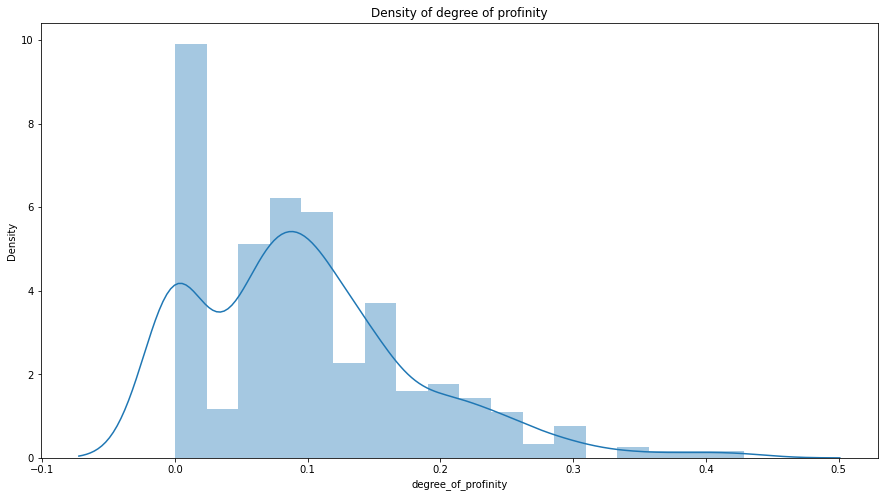

In [72]:
#import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#define figure size
plt.figure(figsize=(15,8))

#density plot
sns.distplot(df['degree_of_profinity'])
plt.title("Density of degree of profinity")

# **Thank you........**

----